In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!pip install opencv-python-headless


In [3]:
import zipfile

zip_path = '/content/drive/MyDrive/Index/coil-100.zip'
extract_path = '/content/coil-100'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [5]:
import cv2
import numpy as np
import os
from google.colab import files

def calculate_histogram(image, bins=32):
    hist = []
    for i in range(3):  # Pour chaque canal de couleur (R, G, B)
        hist.append(cv2.calcHist([image], [i], None, [bins], [0, 256]))
    hist = np.concatenate(hist).ravel()
    return hist

def calculate_hu_moments(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray_image)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

def calculate_similarity(hist1, hist2, hu1, hu2, w1=0.5, w2=0.5):
    hist_dist = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
    hu_dist = np.linalg.norm(hu1 - hu2)
    return w1 * hist_dist + w2 * hu_dist

def process_images(database_path, query_image_path, N=5):
    query_image = cv2.imread(query_image_path)
    query_hist = calculate_histogram(query_image)
    query_hu = calculate_hu_moments(query_image)

    results = []

    for filename in os.listdir(database_path):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".tif"):
            image_path = os.path.join(database_path, filename)
            image = cv2.imread(image_path)

            hist = calculate_histogram(image)
            hu = calculate_hu_moments(image)

            distance = calculate_similarity(query_hist, hist, query_hu, hu)
            results.append((filename, distance))

    results.sort(key=lambda x: x[1])

    for i in range(min(N, len(results))):
        print(f"{results[i][0]}: {results[i][1]:.6f}")

# Télécharger l'image requête
uploaded = files.upload()
query_image_path = list(uploaded.keys())[0]

# Définir le chemin vers le dossier contenant les images de la base de données
database_path = "/content/coil-100/coil-100"

# Exécuter le processus de recherche
process_images(database_path, query_image_path)


Saving obj1__0.png to obj1__0.png
obj1__0.png: 0.000000
obj1__5.png: 273.756893
obj1__355.png: 542.253784
obj1__10.png: 748.986509
obj1__15.png: 1281.209504


In [6]:
# Télécharger l'image requête
uploaded = files.upload()
query_image_path = list(uploaded.keys())[0]

# Exécuter le processus de recherche
process_images("/content/coil-100/coil-100", query_image_path)


Saving obj5__125.png to obj5__125.png
obj5__125.png: 0.000000
obj5__120.png: 158.377102
obj5__130.png: 202.421120
obj5__115.png: 204.433904
obj5__135.png: 231.011835


Saving obj6__85.png to obj6__85.png


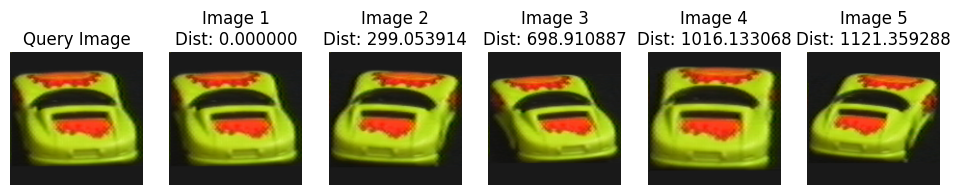

In [7]:
import cv2
import numpy as np
import os
from google.colab import files
import matplotlib.pyplot as plt

def calculate_histogram(image, bins=32):
    hist = []
    for i in range(3):  # Pour chaque canal de couleur (R, G, B)
        hist.append(cv2.calcHist([image], [i], None, [bins], [0, 256]))
    hist = np.concatenate(hist).ravel()
    return hist

def calculate_hu_moments(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray_image)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

def calculate_similarity(hist1, hist2, hu1, hu2, w1=0.5, w2=0.5):
    hist_dist = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
    hu_dist = np.linalg.norm(hu1 - hu2)
    return w1 * hist_dist + w2 * hu_dist

def process_images(database_path, query_image_path, N=5):
    query_image = cv2.imread(query_image_path)
    query_hist = calculate_histogram(query_image)
    query_hu = calculate_hu_moments(query_image)

    results = []

    for filename in os.listdir(database_path):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".tif"):
            image_path = os.path.join(database_path, filename)
            image = cv2.imread(image_path)

            hist = calculate_histogram(image)
            hu = calculate_hu_moments(image)

            distance = calculate_similarity(query_hist, hist, query_hu, hu)
            results.append((filename, distance))

    results.sort(key=lambda x: x[1])

    # Affichage de l'image requête
    plt.figure(figsize=(12, 2))
    plt.subplot(1, N + 1, 1)
    plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
    plt.title("Query Image")
    plt.axis('off')

    # Affichage des N images les plus proches
    for i in range(min(N, len(results))):
        img_path = os.path.join(database_path, results[i][0])
        img = cv2.imread(img_path)
        plt.subplot(1, N + 1, i + 2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Image {i+1}\nDist: {results[i][1]:.6f}")
        plt.axis('off')

    plt.show()

# Télécharger l'image requête
uploaded = files.upload()
query_image_path = list(uploaded.keys())[0]

# Définir le chemin vers le dossier contenant les images de la base de données
database_path = "/content/coil-100/coil-100"

# Exécuter le processus de recherche
process_images(database_path, query_image_path)


Saving obj1__65.png to obj1__65.png
Matrice de confusion:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


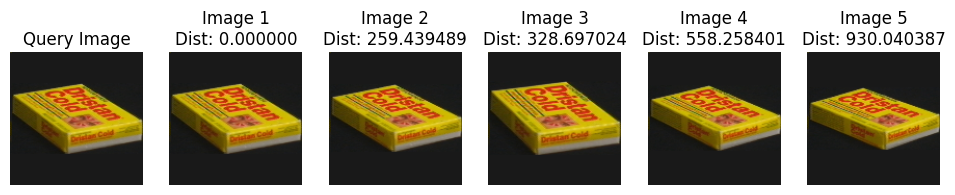

In [8]:
import cv2
import numpy as np
import os
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def calculate_histogram(image, bins=32):
    hist = []
    for i in range(3):  # Pour chaque canal de couleur (R, G, B)
        hist.append(cv2.calcHist([image], [i], None, [bins], [0, 256]))
    hist = np.concatenate(hist).ravel()
    return hist

def calculate_hu_moments(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray_image)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

def calculate_similarity(hist1, hist2, hu1, hu2, w1=0.5, w2=0.5):
    hist_dist = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
    hu_dist = np.linalg.norm(hu1 - hu2)
    return w1 * hist_dist + w2 * hu_dist

def process_images(database_path, query_image_path, N=5):
    query_image = cv2.imread(query_image_path)
    query_hist = calculate_histogram(query_image)
    query_hu = calculate_hu_moments(query_image)

    results = []

    # Lire les étiquettes des images de la base de données
    true_labels = []
    predicted_labels = []
    query_label = query_image_path.split('/')[-1].split('__')[0]  # Supposons que l'étiquette soit dans le nom du fichier

    for filename in os.listdir(database_path):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".tif"):
            image_path = os.path.join(database_path, filename)
            image = cv2.imread(image_path)

            hist = calculate_histogram(image)
            hu = calculate_hu_moments(image)

            distance = calculate_similarity(query_hist, hist, query_hu, hu)
            results.append((filename, distance))

            # Étiquettes
            true_label = filename.split('__')[0]  # Supposons que l'étiquette soit dans le nom du fichier
            true_labels.append(true_label)

    results.sort(key=lambda x: x[1])

    # Prendre les N meilleurs résultats comme prédictions
    for i in range(min(N, len(results))):
        predicted_label = results[i][0].split('__')[0]
        predicted_labels.append(predicted_label)

    # Calcul de la matrice de confusion et des métriques
    cm = confusion_matrix([query_label]*N, predicted_labels, labels=list(set(true_labels)))
    precision = precision_score([query_label]*N, predicted_labels, average='macro')
    recall = recall_score([query_label]*N, predicted_labels, average='macro')
    f1 = f1_score([query_label]*N, predicted_labels, average='macro')

    print("Matrice de confusion:\n", cm)
    print("Précision: {:.4f}".format(precision))
    print("Rappel: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1))

    # Affichage de l'image requête
    plt.figure(figsize=(12, 2))
    plt.subplot(1, N + 1, 1)
    plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
    plt.title("Query Image")
    plt.axis('off')

    # Affichage des N images les plus proches
    for i in range(min(N, len(results))):
        img_path = os.path.join(database_path, results[i][0])
        img = cv2.imread(img_path)
        plt.subplot(1, N + 1, i + 2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Image {i+1}\nDist: {results[i][1]:.6f}")
        plt.axis('off')

    plt.show()

# Télécharger l'image requête
uploaded = files.upload()
query_image_path = list(uploaded.keys())[0]

# Définir le chemin vers le dossier contenant les images de la base de données
database_path = "/content/coil-100/coil-100"

# Exécuter le processus de recherche
process_images(database_path, query_image_path)


Saving obj13__0.png to obj13__0.png
Saving obj14__0.png to obj14__0.png
Saving obj15__0.png to obj15__0.png
Saving obj16__0.png to obj16__0.png
Saving obj17__20.png to obj17__20.png
Saving obj18__75.png to obj18__75.png
Saving obj19__0.png to obj19__0.png
Saving obj20__25.png to obj20__25.png
Saving obj21__190.png to obj21__190.png
Saving obj22__5.png to obj22__5.png
Matrice de confusion:
 [[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


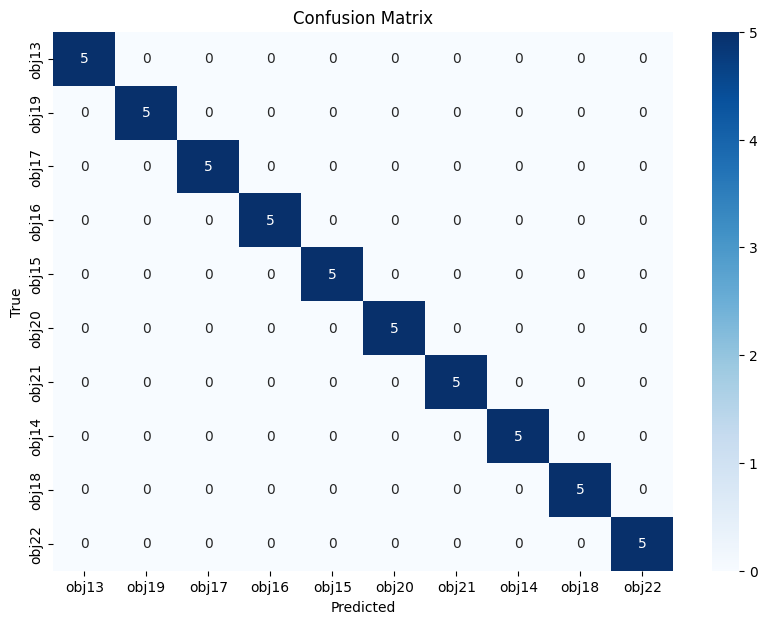

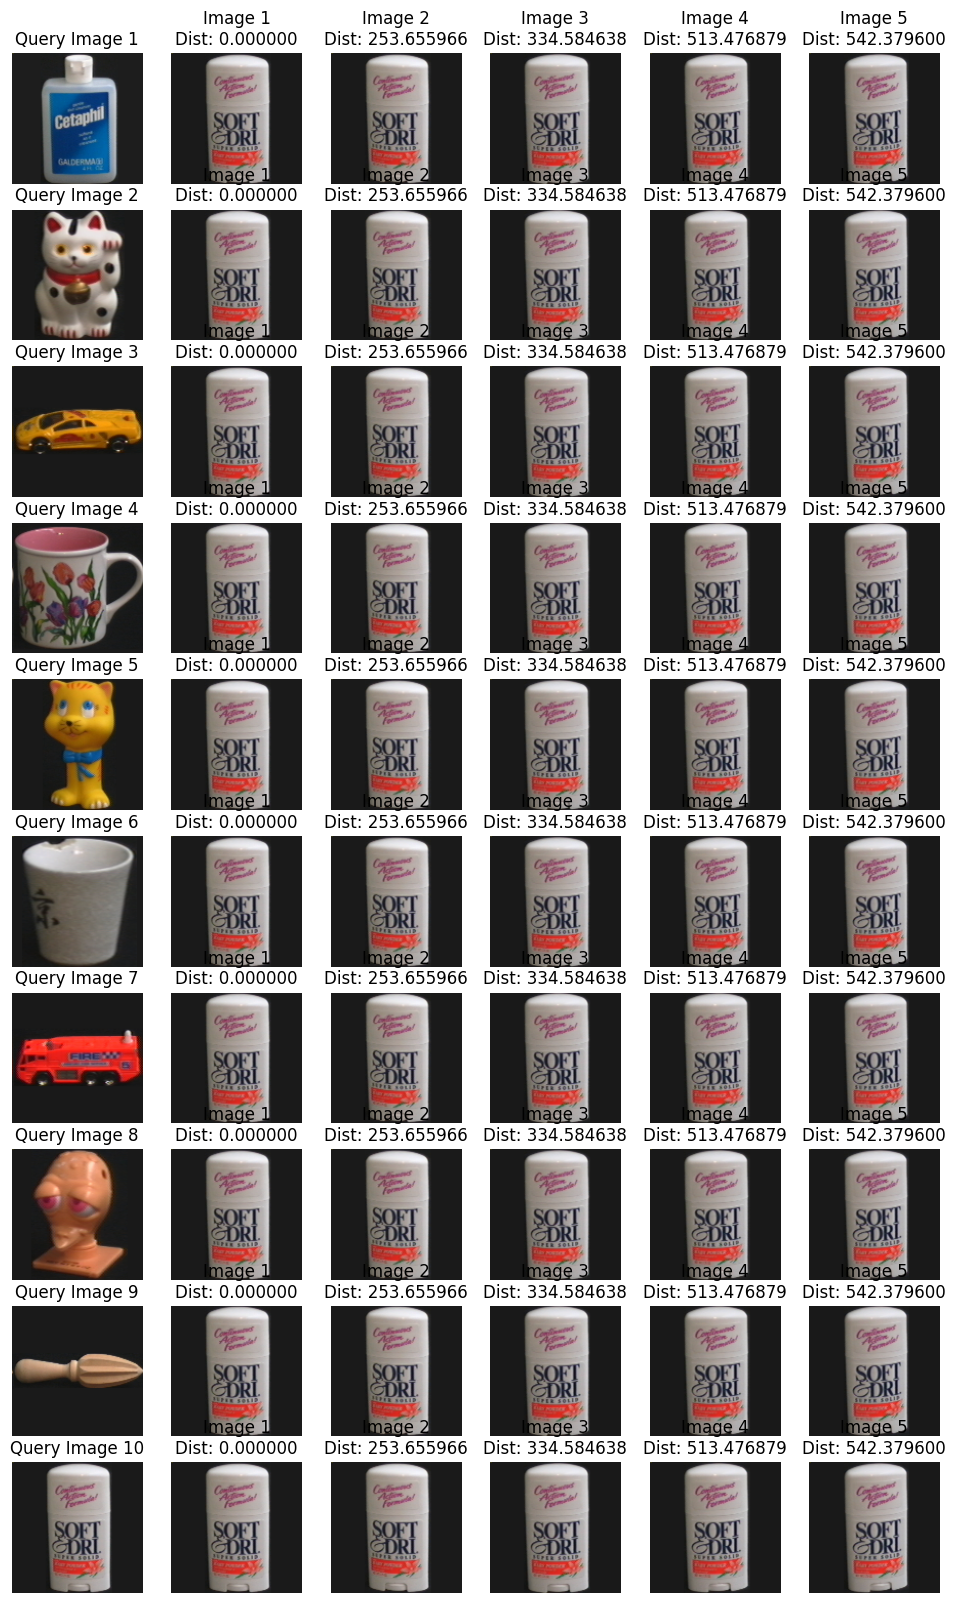

In [9]:
import cv2
import numpy as np
import os
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def calculate_histogram(image, bins=32):
    hist = []
    for i in range(3):  # Pour chaque canal de couleur (R, G, B)
        hist.append(cv2.calcHist([image], [i], None, [bins], [0, 256]))
    hist = np.concatenate(hist).ravel()
    return hist

def calculate_hu_moments(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray_image)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

def calculate_similarity(hist1, hist2, hu1, hu2, w1=0.5, w2=0.5):
    hist_dist = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
    hu_dist = np.linalg.norm(hu1 - hu2)
    return w1 * hist_dist + w2 * hu_dist

def process_images(database_path, query_image_paths, N=5):
    all_true_labels = []
    all_predicted_labels = []

    for query_image_path in query_image_paths:
        query_image = cv2.imread(query_image_path)
        query_hist = calculate_histogram(query_image)
        query_hu = calculate_hu_moments(query_image)
        query_label = query_image_path.split('/')[-1].split('__')[0]  # Supposons que l'étiquette soit dans le nom du fichier

        results = []

        for filename in os.listdir(database_path):
            if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".tif"):
                image_path = os.path.join(database_path, filename)
                image = cv2.imread(image_path)

                hist = calculate_histogram(image)
                hu = calculate_hu_moments(image)

                distance = calculate_similarity(query_hist, hist, query_hu, hu)
                results.append((filename, distance))

        results.sort(key=lambda x: x[1])

        # Prendre les N meilleurs résultats comme prédictions
        predicted_labels = []
        for i in range(min(N, len(results))):
            predicted_label = results[i][0].split('__')[0]
            predicted_labels.append(predicted_label)

        # Ajouter les prédictions et les vraies étiquettes pour cette image de requête
        all_true_labels.extend([query_label] * N)
        all_predicted_labels.extend(predicted_labels)

    # Calcul de la matrice de confusion et des métriques
    cm = confusion_matrix(all_true_labels, all_predicted_labels, labels=list(set(all_true_labels)))
    precision = precision_score(all_true_labels, all_predicted_labels, average='macro')
    recall = recall_score(all_true_labels, all_predicted_labels, average='macro')
    f1 = f1_score(all_true_labels, all_predicted_labels, average='macro')

    print("Matrice de confusion:\n", cm)
    print("Précision: {:.4f}".format(precision))
    print("Rappel: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1))

    # Affichage de la matrice de confusion en couleur
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(set(all_true_labels)), yticklabels=list(set(all_true_labels)))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Affichage de quelques résultats
    plt.figure(figsize=(12, 2 * len(query_image_paths)))
    for idx, query_image_path in enumerate(query_image_paths):
        query_image = cv2.imread(query_image_path)
        plt.subplot(len(query_image_paths), N + 1, idx * (N + 1) + 1)
        plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Query Image {idx+1}")
        plt.axis('off')

        for i in range(min(N, len(results))):
            img_path = os.path.join(database_path, results[i][0])
            img = cv2.imread(img_path)
            plt.subplot(len(query_image_paths), N + 1, idx * (N + 1) + i + 2)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f"Image {i+1}\nDist: {results[i][1]:.6f}")
            plt.axis('off')

    plt.show()

# Télécharger les images requêtes
uploaded = files.upload()
query_image_paths = list(uploaded.keys())[:10]  # Limiter à 10 images de requête

# Définir le chemin vers le dossier contenant les images de la base de données
database_path = "/content/coil-100/coil-100"

# Exécuter le processus de recherche sur plusieurs objets de requête
process_images(database_path, query_image_paths, N=5)


Saving obj1__0.png to obj1__0 (1).png
Saving obj2__0.png to obj2__0.png
Saving obj3__0.png to obj3__0.png
Saving obj4__90.png to obj4__90.png
Saving obj5__75.png to obj5__75.png
Saving obj6__60.png to obj6__60.png
Saving obj7__15.png to obj7__15.png
Saving obj8__75.png to obj8__75.png
Saving obj9__30.png to obj9__30.png
Saving obj10__90.png to obj10__90.png
Saving obj11__45.png to obj11__45.png


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matrice de confusion:
 [[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]
Précision: 0.9091
Rappel: 0.8909
F1 Score: 0.8990


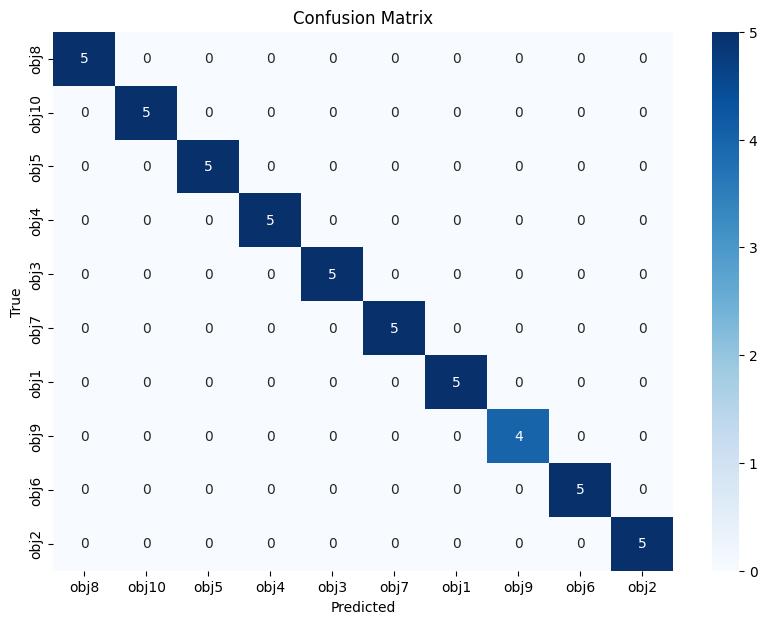

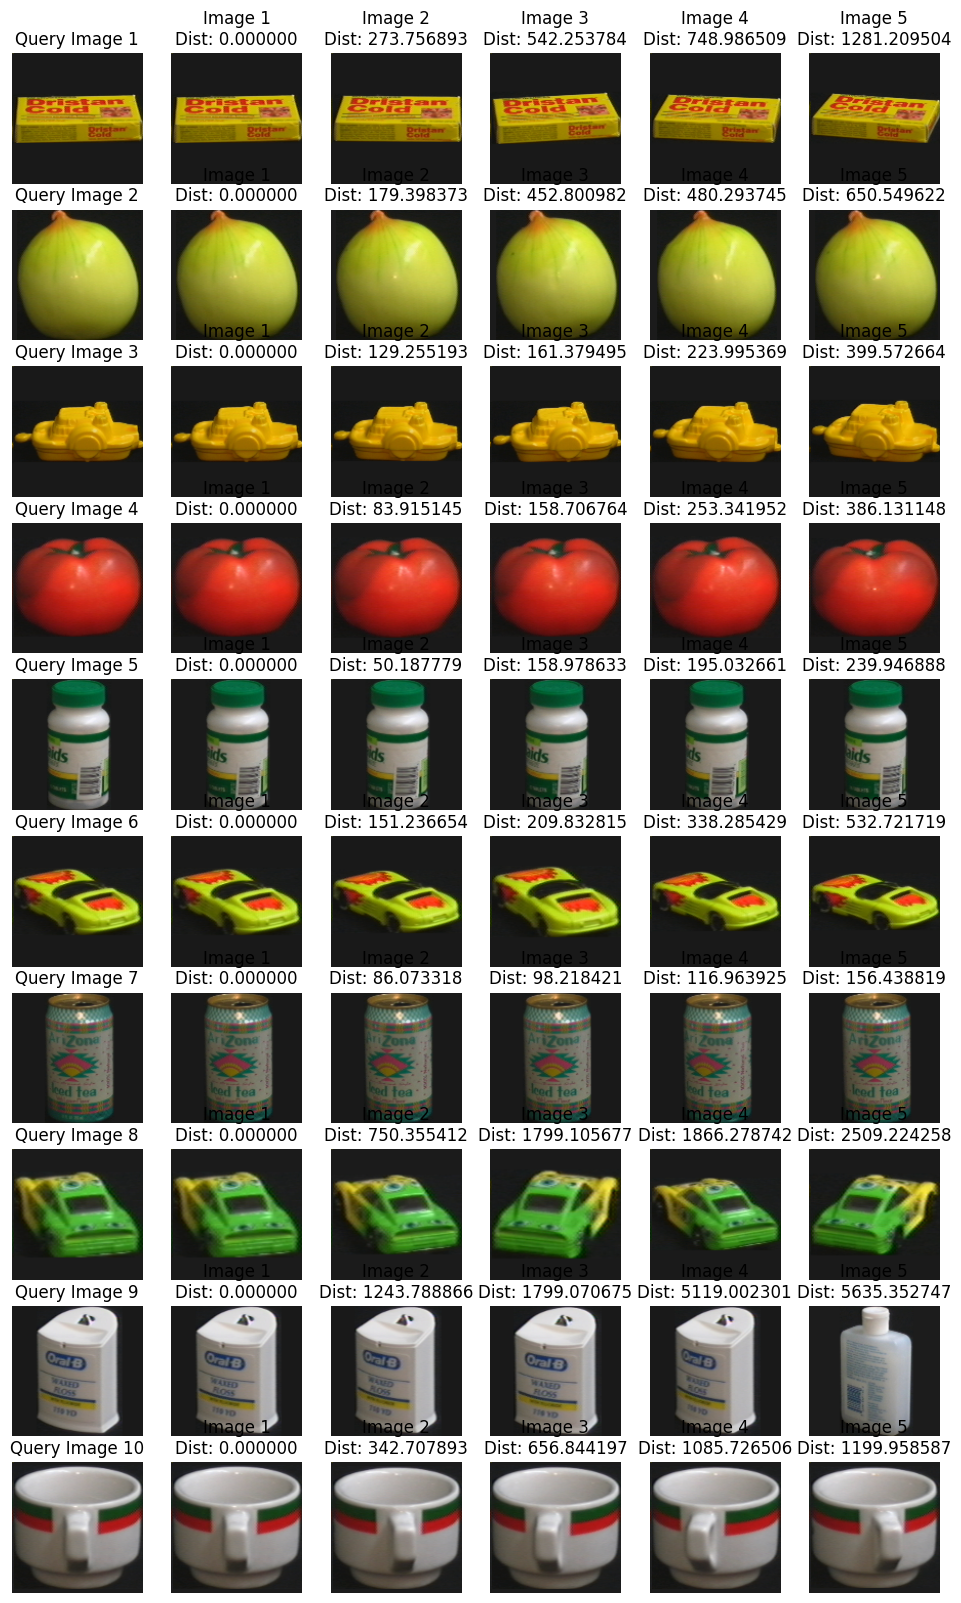

In [10]:
import cv2
import numpy as np
import os
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def calculate_histogram(image, bins=32):
    hist = []
    for i in range(3):  # Pour chaque canal de couleur (R, G, B)
        hist.append(cv2.calcHist([image], [i], None, [bins], [0, 256]))
    hist = np.concatenate(hist).ravel()
    return hist

def calculate_hu_moments(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray_image)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

def calculate_similarity(hist1, hist2, hu1, hu2, w1=0.5, w2=0.5):
    hist_dist = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
    hu_dist = np.linalg.norm(hu1 - hu2)
    return w1 * hist_dist + w2 * hu_dist

def process_images(database_path, query_image_paths, N=5):
    all_true_labels = []
    all_predicted_labels = []
    query_results = {}

    for query_image_path in query_image_paths:
        query_image = cv2.imread(query_image_path)
        query_hist = calculate_histogram(query_image)
        query_hu = calculate_hu_moments(query_image)
        query_label = query_image_path.split('/')[-1].split('__')[0]  # Supposons que l'étiquette soit dans le nom du fichier

        results = []

        for filename in os.listdir(database_path):
            if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".tif"):
                image_path = os.path.join(database_path, filename)
                image = cv2.imread(image_path)

                hist = calculate_histogram(image)
                hu = calculate_hu_moments(image)

                distance = calculate_similarity(query_hist, hist, query_hu, hu)
                results.append((filename, distance))

        results.sort(key=lambda x: x[1])

        # Prendre les N meilleurs résultats comme prédictions
        predicted_labels = []
        for i in range(min(N, len(results))):
            predicted_label = results[i][0].split('__')[0]
            predicted_labels.append(predicted_label)

        # Ajouter les prédictions et les vraies étiquettes pour cette image de requête
        all_true_labels.extend([query_label] * N)
        all_predicted_labels.extend(predicted_labels)

        # Enregistrer les résultats pour cette image de requête
        query_results[query_image_path] = results[:N]

    # Calcul de la matrice de confusion et des métriques
    cm = confusion_matrix(all_true_labels, all_predicted_labels, labels=list(set(all_true_labels)))
    precision = precision_score(all_true_labels, all_predicted_labels, average='macro')
    recall = recall_score(all_true_labels, all_predicted_labels, average='macro')
    f1 = f1_score(all_true_labels, all_predicted_labels, average='macro')

    print("Matrice de confusion:\n", cm)
    print("Précision: {:.4f}".format(precision))
    print("Rappel: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1))

    # Affichage de la matrice de confusion en couleur
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(set(all_true_labels)), yticklabels=list(set(all_true_labels)))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Affichage de quelques résultats
    plt.figure(figsize=(12, 2 * len(query_image_paths)))
    for idx, query_image_path in enumerate(query_image_paths):
        query_image = cv2.imread(query_image_path)
        plt.subplot(len(query_image_paths), N + 1, idx * (N + 1) + 1)
        plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Query Image {idx+1}")
        plt.axis('off')

        results = query_results[query_image_path]
        for i in range(len(results)):
            img_path = os.path.join(database_path, results[i][0])
            img = cv2.imread(img_path)
            plt.subplot(len(query_image_paths), N + 1, idx * (N + 1) + i + 2)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f"Image {i+1}\nDist: {results[i][1]:.6f}")
            plt.axis('off')

    plt.show()

# Télécharger les images requêtes
uploaded = files.upload()
query_image_paths = list(uploaded.keys())[:10]  # Limiter à 10 images de requête

# Définir le chemin vers le dossier contenant les images de la base de données
database_path = "/content/coil-100/coil-100"

# Exécuter le processus de recherche sur plusieurs objets de requête
process_images(database_path, query_image_paths, N=5)


Saving obj1__0.png to obj1__0.png
Saving obj2__0.png to obj2__0.png
Saving obj3__350.png to obj3__350.png
Saving obj4__20.png to obj4__20.png
Saving obj5__0.png to obj5__0.png
Saving obj6__345.png to obj6__345.png
Saving obj7__0.png to obj7__0.png
Saving obj8__35.png to obj8__35.png
Saving obj9__50.png to obj9__50.png
Saving obj10__10.png to obj10__10.png
Temps d'exécution pour l'image de requête obj1__0.png avec K-Means: 0.0162 secondes
Temps d'exécution pour l'image de requête obj1__0.png sans K-Means: 0.0686 secondes
Temps d'exécution pour l'image de requête obj2__0.png avec K-Means: 0.0093 secondes
Temps d'exécution pour l'image de requête obj2__0.png sans K-Means: 0.0691 secondes
Temps d'exécution pour l'image de requête obj3__350.png avec K-Means: 0.0096 secondes
Temps d'exécution pour l'image de requête obj3__350.png sans K-Means: 0.0701 secondes
Temps d'exécution pour l'image de requête obj4__20.png avec K-Means: 0.0059 secondes
Temps d'exécution pour l'image de requête obj4__2

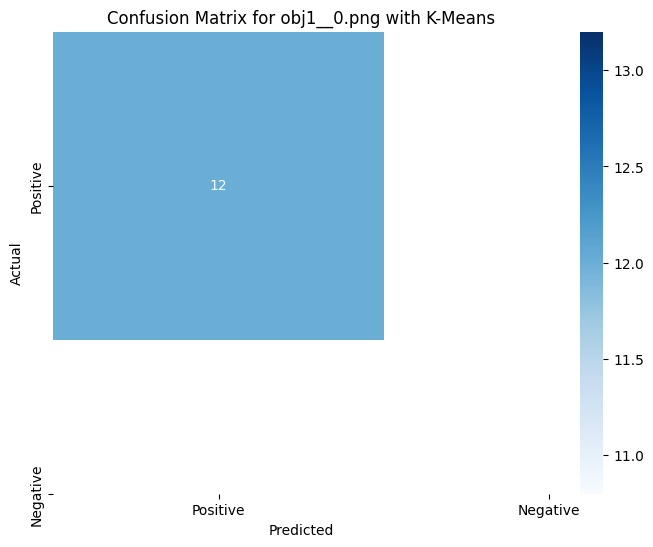

Requête: obj1__0.png
obj1__0.png: 0.000000
obj1__0.png: 0.000000
obj1__5.png: 273.756893
obj1__355.png: 542.253784
obj1__10.png: 748.986509
obj1__15.png: 1281.209504
obj1__175.png: 1319.928321
obj1__190.png: 1455.839297
obj1__180.png: 1516.478523
obj1__185.png: 1519.256914
obj1__20.png: 1928.618896
obj1__350.png: 2318.504970
obj84__25.png: 2541.914049
obj1__195.png: 2545.042505
obj84__0.png: 2601.315174
obj84__10.png: 2642.802974
obj84__20.png: 2683.923352
obj84__355.png: 2760.189931
obj84__30.png: 2788.261423
obj84__15.png: 2851.994231
obj84__5.png: 2892.168473


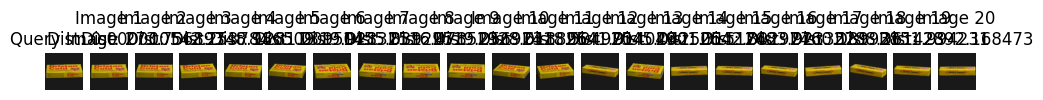

Métriques pour l'image de requête obj2__0.png avec K-Means:
Matrice de confusion:
 [[20]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


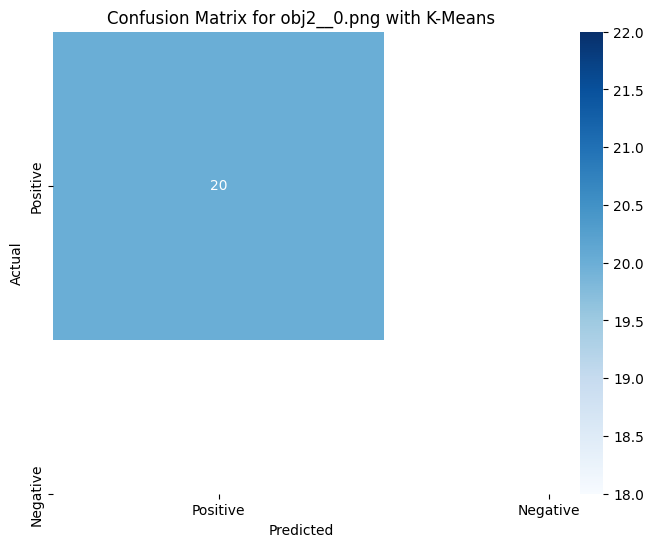

Requête: obj2__0.png
obj2__0.png: 0.000000
obj2__0.png: 0.000000
obj2__355.png: 179.398373
obj2__335.png: 452.800982
obj2__20.png: 480.293745
obj2__345.png: 650.549622
obj2__25.png: 728.982711
obj2__10.png: 806.956905
obj2__5.png: 1092.702570
obj2__330.png: 1171.060263
obj2__15.png: 1183.757838
obj2__290.png: 1331.786494
obj2__325.png: 1336.164251
obj2__350.png: 1344.061920
obj2__340.png: 1452.157006
obj2__135.png: 1806.519460
obj2__295.png: 1874.362372
obj2__315.png: 1898.817358
obj2__120.png: 2250.442291
obj2__300.png: 2332.039145
obj2__130.png: 2429.507980


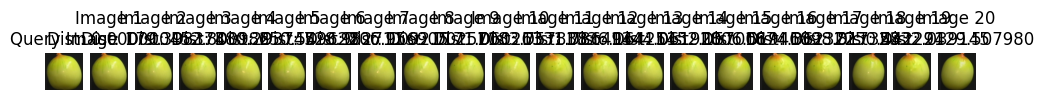

Métriques pour l'image de requête obj3__350.png avec K-Means:
Matrice de confusion:
 [[20]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


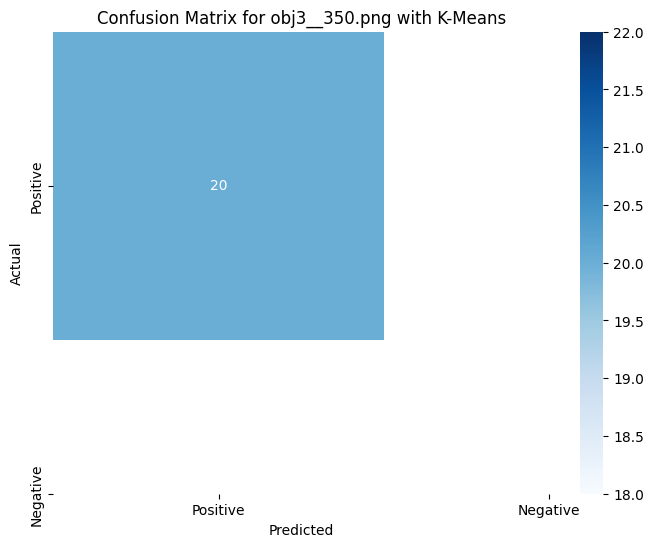

Requête: obj3__350.png
obj3__350.png: 0.000000
obj3__350.png: 0.000000
obj3__345.png: 120.942933
obj3__355.png: 190.503951
obj3__175.png: 438.294708
obj3__170.png: 443.537295
obj3__340.png: 451.926394
obj3__0.png: 460.286664
obj3__180.png: 520.373380
obj3__165.png: 585.760946
obj3__185.png: 643.057529
obj3__5.png: 669.455917
obj3__190.png: 692.479846
obj3__10.png: 692.984384
obj3__195.png: 801.109914
obj3__15.png: 802.039339
obj3__200.png: 881.935099
obj3__20.png: 909.897842
obj3__335.png: 969.647652
obj3__160.png: 1054.284657
obj3__205.png: 1243.090816


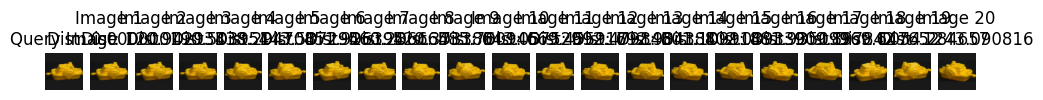

Métriques pour l'image de requête obj4__20.png avec K-Means:
Matrice de confusion:
 [[20]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


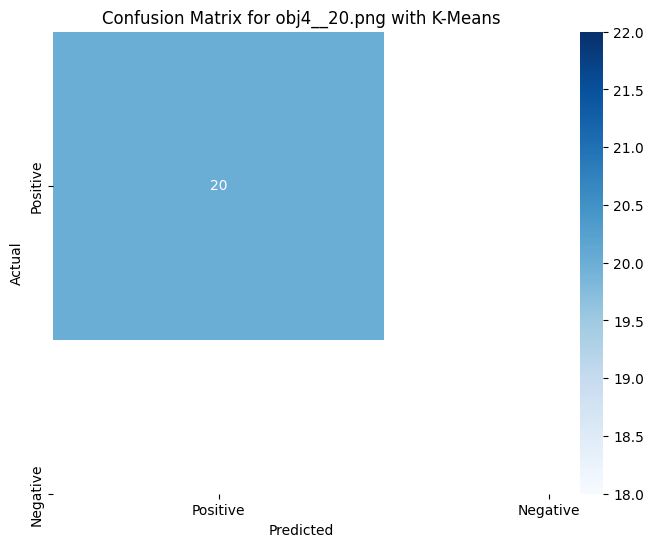

Requête: obj4__20.png
obj4__20.png: 0.000000
obj4__20.png: 0.000000
obj4__25.png: 155.336906
obj4__15.png: 179.418572
obj4__10.png: 274.087653
obj4__30.png: 359.217073
obj4__215.png: 505.173962
obj4__210.png: 521.966419
obj4__220.png: 543.682558
obj4__205.png: 558.097465
obj4__225.png: 580.633835
obj4__35.png: 582.533696
obj4__275.png: 605.156059
obj4__270.png: 605.432595
obj4__265.png: 623.088215
obj4__5.png: 626.264617
obj4__200.png: 670.239893
obj4__260.png: 674.864609
obj4__195.png: 710.798294
obj4__280.png: 711.844573
obj4__245.png: 747.262330


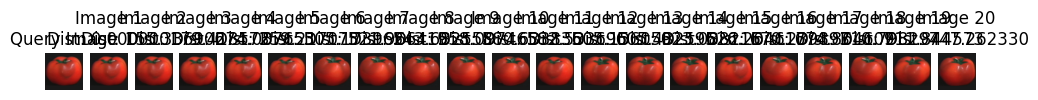

Métriques pour l'image de requête obj5__0.png avec K-Means:
Matrice de confusion:
 [[20]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


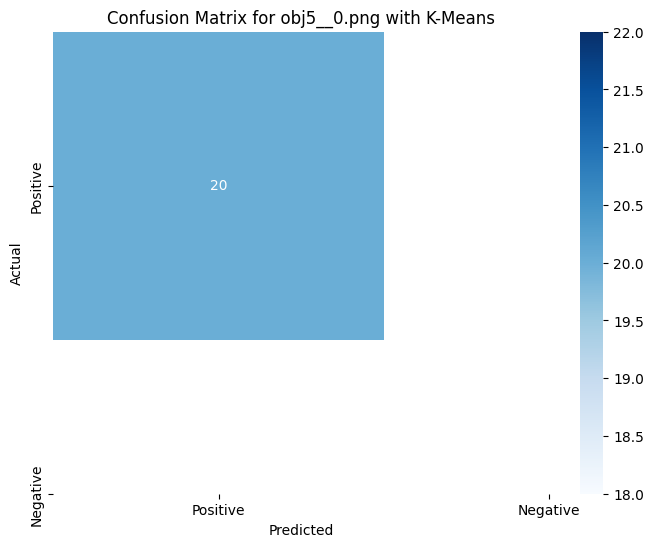

Requête: obj5__0.png
obj5__0.png: 0.000000
obj5__0.png: 0.000000
obj5__5.png: 71.856231
obj5__355.png: 85.662785
obj5__350.png: 188.863189
obj5__10.png: 220.325471
obj5__15.png: 302.918640
obj5__20.png: 306.433799
obj5__345.png: 386.263863
obj5__340.png: 466.864694
obj5__25.png: 487.509170
obj5__35.png: 509.726126
obj5__335.png: 530.474231
obj5__40.png: 604.561847
obj5__30.png: 632.212328
obj5__330.png: 675.784547
obj5__275.png: 709.701643
obj5__320.png: 709.803609
obj5__325.png: 725.116967
obj5__250.png: 728.553582
obj5__265.png: 736.335839


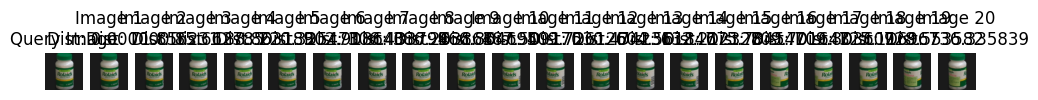

Métriques pour l'image de requête obj6__345.png avec K-Means:
Matrice de confusion:
 [[20]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


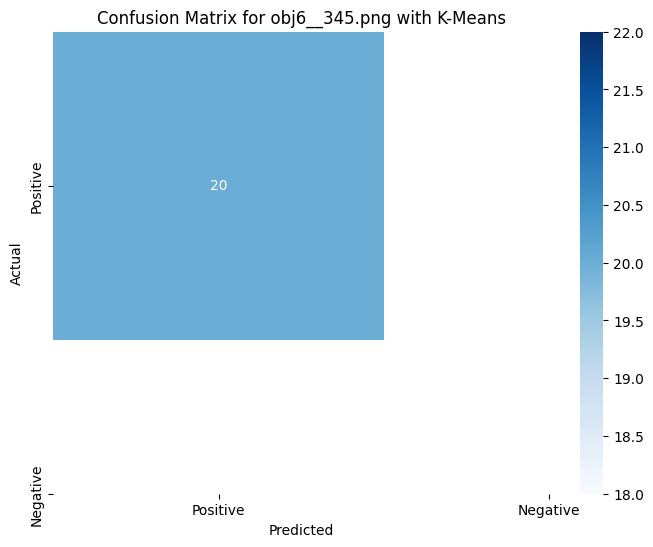

Requête: obj6__345.png
obj6__345.png: 0.000000
obj6__345.png: 0.000000
obj6__340.png: 100.549673
obj6__350.png: 126.417123
obj6__160.png: 207.422912
obj6__155.png: 224.419731
obj6__355.png: 275.590042
obj6__165.png: 288.555897
obj6__335.png: 297.352804
obj6__150.png: 390.689911
obj6__170.png: 390.765277
obj6__330.png: 451.149271
obj6__145.png: 522.798877
obj6__0.png: 525.640117
obj6__25.png: 620.810412
obj6__20.png: 649.199512
obj6__15.png: 653.916991
obj6__175.png: 682.034306
obj6__30.png: 703.638026
obj6__10.png: 725.411322
obj6__185.png: 739.595636


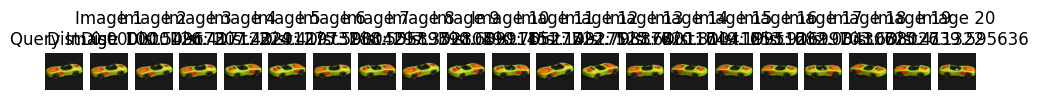

Métriques pour l'image de requête obj7__0.png avec K-Means:
Matrice de confusion:
 [[20]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


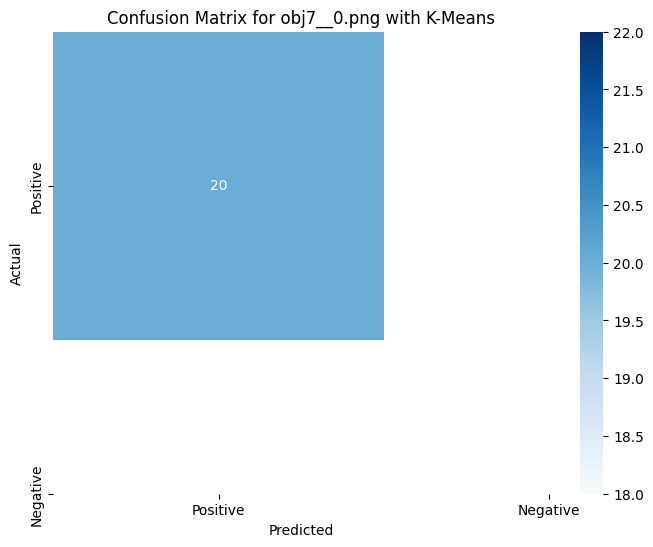

Requête: obj7__0.png
obj7__0.png: 0.000000
obj7__0.png: 0.000000
obj7__5.png: 121.112150
obj7__355.png: 140.567790
obj7__10.png: 180.195899
obj7__350.png: 207.213318
obj7__15.png: 232.135105
obj7__135.png: 336.110573
obj7__20.png: 336.817519
obj7__25.png: 355.244971
obj7__140.png: 365.238505
obj7__130.png: 369.209905
obj7__145.png: 413.246937
obj7__125.png: 420.003042
obj7__345.png: 464.297232
obj7__340.png: 510.422445
obj7__30.png: 519.281044
obj7__150.png: 520.723851
obj7__120.png: 549.668199
obj7__290.png: 590.745647
obj7__285.png: 599.874831


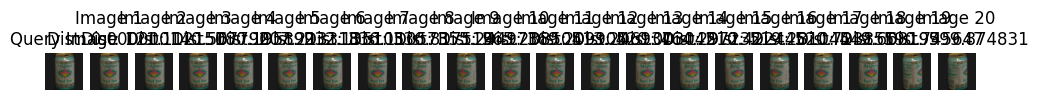

Métriques pour l'image de requête obj8__35.png avec K-Means:
Matrice de confusion:
 [[20]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


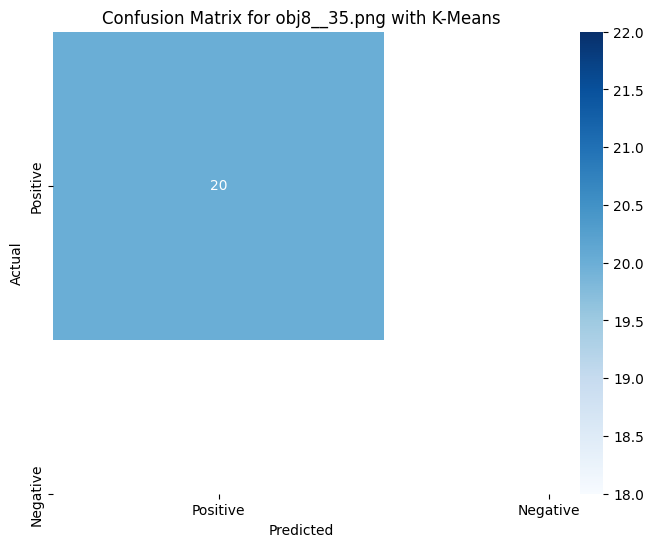

Requête: obj8__35.png
obj8__35.png: 0.000000
obj8__35.png: 0.000000
obj8__40.png: 230.844706
obj8__30.png: 517.542700
obj8__25.png: 553.946102
obj8__45.png: 878.381920
obj8__15.png: 889.066565
obj8__20.png: 945.563485
obj8__50.png: 1184.574387
obj8__180.png: 1700.296285
obj8__355.png: 1894.303803
obj8__200.png: 1949.245462
obj8__5.png: 1967.651225
obj8__185.png: 2004.101230
obj8__175.png: 2053.911605
obj8__190.png: 2082.530841
obj8__210.png: 2095.366248
obj8__10.png: 2178.305813
obj8__0.png: 2191.928662
obj8__55.png: 2401.202983
obj8__195.png: 2438.727235


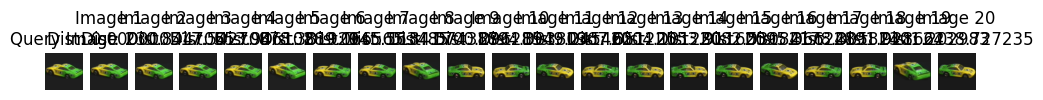

Métriques pour l'image de requête obj9__50.png avec K-Means:
Matrice de confusion:
 [[6]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 0.1429
Rappel: 0.0429
F1 Score: 0.0659


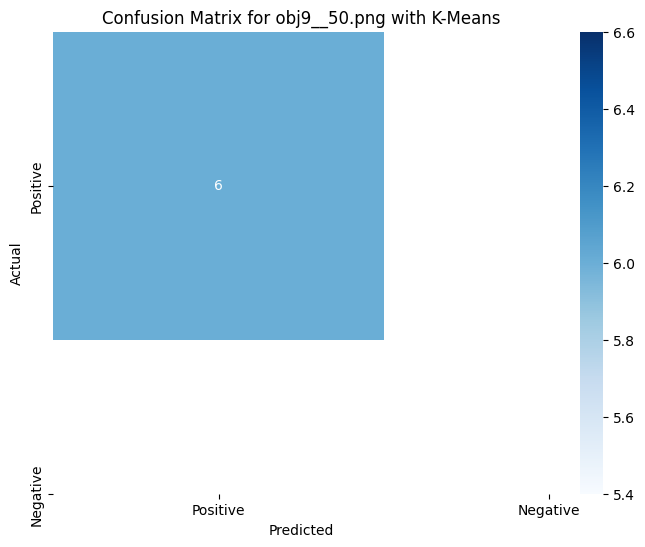

Requête: obj9__50.png
obj9__50.png: 0.000000
obj9__50.png: 0.000000
obj9__45.png: 1196.181177
obj9__55.png: 1403.858156
obj9__60.png: 3523.387077
obj9__65.png: 3530.437853
obj9__70.png: 8232.987823
obj97__75.png: 10482.784276
obj97__80.png: 10733.028316
obj89__65.png: 12048.837977
obj14__25.png: 12304.880744
obj97__85.png: 12576.063287
obj65__55.png: 12600.194850
obj55__305.png: 12621.437907
obj55__245.png: 12657.406460
obj55__300.png: 13051.995340
obj55__250.png: 13115.232351
obj97__65.png: 13242.547331
obj37__190.png: 13372.537630
obj37__115.png: 13488.191505
obj14__20.png: 13582.617366


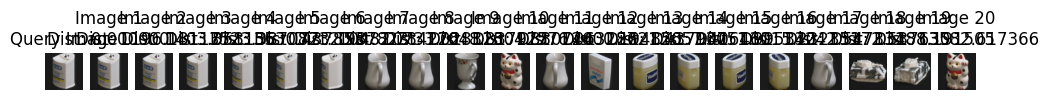

Métriques pour l'image de requête obj10__10.png avec K-Means:
Matrice de confusion:
 [[9]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 0.3333
Rappel: 0.1500
F1 Score: 0.2069


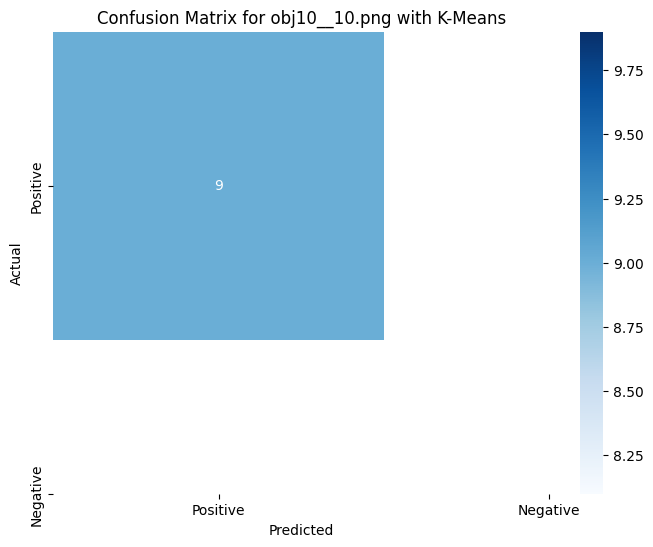

Requête: obj10__10.png
obj10__10.png: 0.000000
obj10__10.png: 0.000000
obj10__0.png: 135.305249
obj10__355.png: 231.089795
obj10__5.png: 377.275890
obj10__15.png: 413.687315
obj10__340.png: 546.021718
obj10__350.png: 857.277023
obj10__345.png: 1051.992558
obj10__20.png: 1914.385425
obj37__65.png: 2271.992999
obj37__0.png: 2529.023597
obj37__60.png: 2533.693576
obj37__70.png: 2658.642799
obj89__105.png: 2708.528602
obj37__355.png: 2828.047524
obj89__110.png: 3148.110655
obj89__240.png: 3201.449575
obj37__5.png: 3203.734309
obj89__100.png: 3215.232010
obj89__95.png: 3272.283024


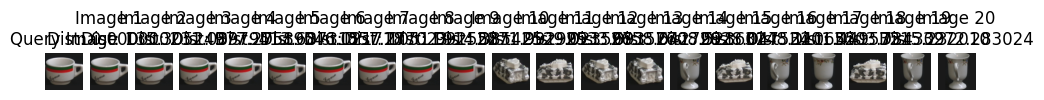

In [4]:
import cv2
import numpy as np
import os
import time
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

def calculate_histogram(image, bins=32):
    hist = []
    for i in range(3):  # Pour chaque canal de couleur (R, G, B)
        h = cv2.calcHist([image], [i], None, [bins], [0, 256])
        hist.append(h.astype(np.float32))  # Convertir en float32
    hist = np.concatenate(hist).ravel()
    return hist

def calculate_hu_moments(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray_image)
    hu_moments = cv2.HuMoments(moments).flatten().astype(np.float32)  # Convertir en float32
    return hu_moments

def calculate_similarity(hist1, hist2, hu1, hu2, w1=0.5, w2=0.5):
    hist_dist = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
    hu_dist = np.linalg.norm(hu1 - hu2)
    return w1 * hist_dist + w2 * hu_dist

def calculate_confusion_matrix_elements(cm):
    if cm.shape == (2, 2):
        TN = cm[0, 0]
        FP = cm[0, 1]
        FN = cm[1, 0]
        TP = cm[1, 1]
    else:
        TN = FP = FN = TP = 0
    return TP, TN, FP, FN

def process_images(database_path, query_image_paths, N=20, num_clusters=10):
    # Calculer les descripteurs pour toutes les images de la base de données
    descriptors = []
    filenames = []

    for filename in os.listdir(database_path):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".tif"):
            image_path = os.path.join(database_path, filename)
            image = cv2.imread(image_path)

            hist = calculate_histogram(image)
            hu = calculate_hu_moments(image)
            descriptor = np.concatenate([hist, hu])

            descriptors.append(descriptor.astype(np.float64))  # Convertir en float64
            filenames.append(filename)

    descriptors = np.array(descriptors)

    # Appliquer K-Means sur les descripteurs
    kmeans_start_time = time.time()
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(descriptors)
    kmeans_end_time = time.time()
    kmeans_execution_time = kmeans_end_time - kmeans_start_time
    labels = kmeans.labels_

    query_results = {}
    execution_times_with_kmeans = []
    execution_times_without_kmeans = []

    for query_image_path in query_image_paths:
        # Avec K-Means
        start_time = time.time()

        query_image = cv2.imread(query_image_path)
        query_hist = calculate_histogram(query_image)
        query_hu = calculate_hu_moments(query_image)
        query_descriptor = np.concatenate([query_hist, query_hu]).astype(np.float64)  # Convertir en float64
        query_label = query_image_path.split('/')[-1].split('__')[0]  # Supposons que l'étiquette soit dans le nom du fichier

        # Trouver le cluster le plus proche pour l'image de requête
        cluster_idx = kmeans.predict([query_descriptor])[0]

        # Comparer l'image de requête uniquement avec les images du même cluster
        cluster_indices = np.where(labels == cluster_idx)[0]

        results_with_kmeans = []

        for idx in cluster_indices:
            filename = filenames[idx]
            descriptor = descriptors[idx]
            hist = descriptor[:96].astype(np.float32)  # 32*3 bins, Convertir en float32
            hu = descriptor[96:].astype(np.float32)  # Convertir en float32

            distance = calculate_similarity(query_hist, hist, query_hu, hu)
            results_with_kmeans.append((filename, distance))

        results_with_kmeans.sort(key=lambda x: x[1])

        # Prendre les N meilleurs résultats comme prédictions
        predicted_labels_with_kmeans = []
        for i in range(min(N, len(results_with_kmeans))):
            predicted_label = results_with_kmeans[i][0].split('__')[0]
            predicted_labels_with_kmeans.append(predicted_label)

        # Enregistrer les résultats pour cette image de requête
        query_results[query_image_path] = (query_label, predicted_labels_with_kmeans, results_with_kmeans[:N])

        end_time = time.time()
        execution_time_with_kmeans = end_time - start_time
        execution_times_with_kmeans.append(execution_time_with_kmeans)

        # Sans K-Means
        start_time = time.time()

        results_without_kmeans = []

        for descriptor, filename in zip(descriptors, filenames):
            hist = descriptor[:96].astype(np.float32)  # 32*3 bins, Convertir en float32
            hu = descriptor[96:].astype(np.float32)  # Convertir en float32

            distance = calculate_similarity(query_hist, hist, query_hu, hu)
            results_without_kmeans.append((filename, distance))

        results_without_kmeans.sort(key=lambda x: x[1])

        # Prendre les N meilleurs résultats comme prédictions
        predicted_labels_without_kmeans = []
        for i in range(min(N, len(results_without_kmeans))):
            predicted_label = results_without_kmeans[i][0].split('__')[0]
            predicted_labels_without_kmeans.append(predicted_label)

        end_time = time.time()
        execution_time_without_kmeans = end_time - start_time
        execution_times_without_kmeans.append(execution_time_without_kmeans)

        # Afficher le temps d'exécution pour l'image de requête
        print(f"Temps d'exécution pour l'image de requête {query_image_path} avec K-Means: {execution_time_with_kmeans:.4f} secondes")
        print(f"Temps d'exécution pour l'image de requête {query_image_path} sans K-Means: {execution_time_without_kmeans:.4f} secondes")

    # Afficher le temps moyen d'exécution
    average_execution_time_with_kmeans = np.mean(execution_times_with_kmeans)
    average_execution_time_without_kmeans = np.mean(execution_times_without_kmeans)
    print(f"Temps moyen d'exécution pour les images de requête avec K-Means: {average_execution_time_with_kmeans:.4f} secondes")
    print(f"Temps moyen d'exécution pour les images de requête sans K-Means: {average_execution_time_without_kmeans:.4f} secondes")
    print(f"Temps d'exécution pour K-Means: {kmeans_execution_time:.4f} secondes")

    for query_image_path, (query_label, predicted_labels_with_kmeans, results_with_kmeans) in query_results.items():
        # Calcul de la matrice de confusion et des métriques pour chaque image de requête
        true_labels = [query_label] * N
        cm_with_kmeans = confusion_matrix(true_labels, predicted_labels_with_kmeans, labels=list(set(true_labels)))
        precision_with_kmeans = precision_score(true_labels, predicted_labels_with_kmeans, average='macro', zero_division=0)
        recall_with_kmeans = recall_score(true_labels, predicted_labels_with_kmeans, average='macro', zero_division=0)
        f1_with_kmeans = f1_score(true_labels, predicted_labels_with_kmeans, average='macro', zero_division=0)

        TP, TN, FP, FN = calculate_confusion_matrix_elements(cm_with_kmeans)

        print(f"Métriques pour l'image de requête {query_image_path} avec K-Means:")
        print("Matrice de confusion:\n", cm_with_kmeans)
        print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
        print("Précision: {:.4f}".format(precision_with_kmeans))
        print("Rappel: {:.4f}".format(recall_with_kmeans))
        print("F1 Score: {:.4f}".format(f1_with_kmeans))

        # Affichage de la matrice de confusion en couleur
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_with_kmeans, annot=True, fmt="d", cmap="Blues", xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {query_image_path} with K-Means')
        plt.show()

        # Affichage des résultats pour cette image de requête
        print(f"Requête: {query_image_path}")
        print(f"{os.path.basename(query_image_path)}: 0.000000")
        for i in range(len(results_with_kmeans)):
            print(f"{results_with_kmeans[i][0]}: {results_with_kmeans[i][1]:.6f}")

        plt.figure(figsize=(12, 10))
        query_image = cv2.imread(query_image_path)
        plt.subplot(1, N + 1, 1)
        plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
        plt.title("Query Image")
        plt.axis('off')

        for i in range(len(results_with_kmeans)):
            img_path = os.path.join(database_path, results_with_kmeans[i][0])
            img = cv2.imread(img_path)
            plt.subplot(1, N + 1, i + 2)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f"Image {i+1}\nDist: {results_with_kmeans[i][1]:.6f}")
            plt.axis('off')

        plt.show()

# Télécharger les images requêtes
uploaded = files.upload()
query_image_paths = list(uploaded.keys())[:10]  # Limiter à 10 images de requête

# Définir le chemin vers le dossier contenant les images de la base de données
database_path = "/content/coil-100/coil-100"

# Exécuter le processus de recherche sur plusieurs objets de requête
process_images(database_path, query_image_paths, N=20, num_clusters=10)


Saving obj1__0.png to obj1__0 (5).png
Saving obj2__0.png to obj2__0 (4).png
Saving obj3__120.png to obj3__120.png
Saving obj4__160.png to obj4__160.png
Saving obj5__0.png to obj5__0 (2).png
Saving obj6__0.png to obj6__0 (3).png
Saving obj7__0.png to obj7__0 (3).png
Saving obj8__135.png to obj8__135.png
Saving obj9__0.png to obj9__0 (3).png
Saving obj10__0.png to obj10__0 (2).png
Temps d'exécution pour l'image de requête obj1__0 (5).png avec K-Means: 0.0126 secondes
Temps d'exécution pour l'image de requête obj1__0 (5).png sans K-Means: 0.0690 secondes
Temps d'exécution pour l'image de requête obj2__0 (4).png avec K-Means: 0.0100 secondes
Temps d'exécution pour l'image de requête obj2__0 (4).png sans K-Means: 0.0847 secondes
Temps d'exécution pour l'image de requête obj3__120.png avec K-Means: 0.0050 secondes
Temps d'exécution pour l'image de requête obj3__120.png sans K-Means: 0.0695 secondes
Temps d'exécution pour l'image de requête obj4__160.png avec K-Means: 0.0054 secondes
Temps d'

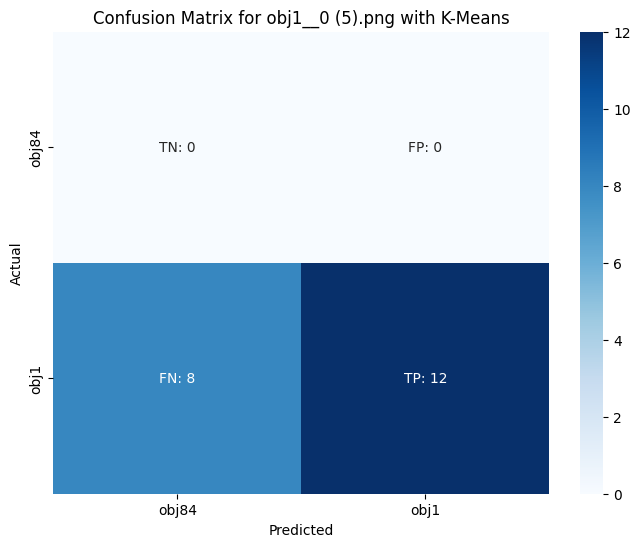

Requête: obj1__0 (5).png
obj1__0 (5).png: 0.000000
obj1__0.png: 0.000000
obj1__5.png: 273.756893
obj1__355.png: 542.253784
obj1__10.png: 748.986509
obj1__15.png: 1281.209504
obj1__175.png: 1319.928321
obj1__190.png: 1455.839297
obj1__180.png: 1516.478523
obj1__185.png: 1519.256914
obj1__20.png: 1928.618896
obj1__350.png: 2318.504970
obj84__25.png: 2541.914049
obj1__195.png: 2545.042505
obj84__0.png: 2601.315174
obj84__10.png: 2642.802974
obj84__20.png: 2683.923352
obj84__355.png: 2760.189931
obj84__30.png: 2788.261423
obj84__15.png: 2851.994231
obj84__5.png: 2892.168473


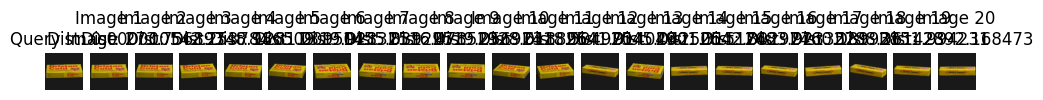

Métriques pour l'image de requête obj2__0 (4).png avec K-Means:
Matrice de confusion:
 [[20]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


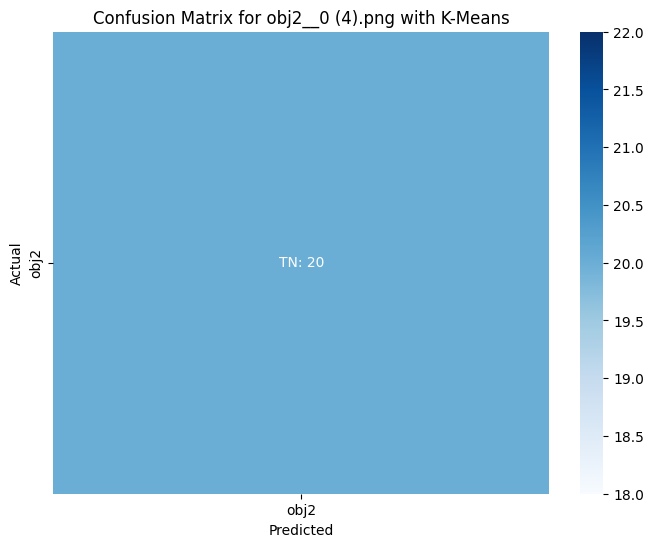

Requête: obj2__0 (4).png
obj2__0 (4).png: 0.000000
obj2__0.png: 0.000000
obj2__355.png: 179.398373
obj2__335.png: 452.800982
obj2__20.png: 480.293745
obj2__345.png: 650.549622
obj2__25.png: 728.982711
obj2__10.png: 806.956905
obj2__5.png: 1092.702570
obj2__330.png: 1171.060263
obj2__15.png: 1183.757838
obj2__290.png: 1331.786494
obj2__325.png: 1336.164251
obj2__350.png: 1344.061920
obj2__340.png: 1452.157006
obj2__135.png: 1806.519460
obj2__295.png: 1874.362372
obj2__315.png: 1898.817358
obj2__120.png: 2250.442291
obj2__300.png: 2332.039145
obj2__130.png: 2429.507980


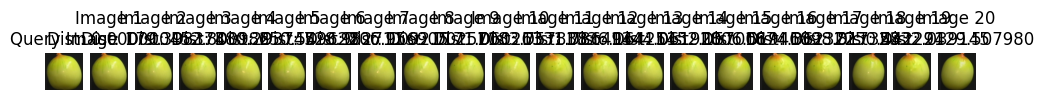

Métriques pour l'image de requête obj3__120.png avec K-Means:
Matrice de confusion:
 [[20]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


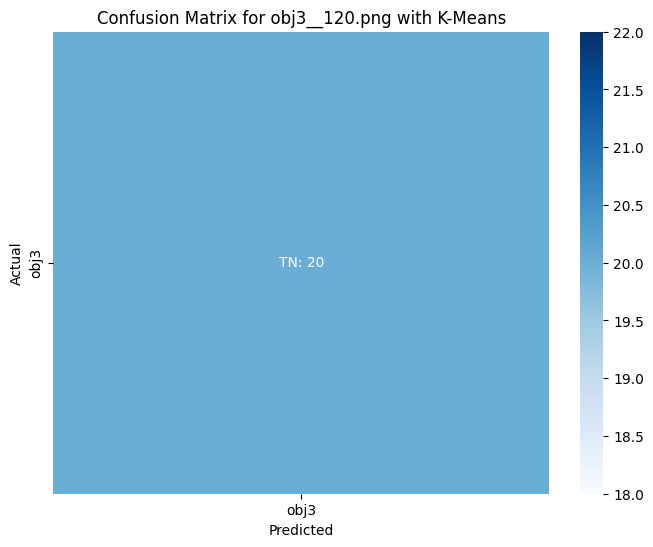

Requête: obj3__120.png
obj3__120.png: 0.000000
obj3__120.png: 0.000000
obj3__115.png: 146.985080
obj3__125.png: 156.329453
obj3__130.png: 588.547930
obj3__110.png: 856.792184
obj3__310.png: 931.467325
obj3__305.png: 965.530317
obj3__135.png: 1231.245832
obj3__300.png: 1317.562738
obj3__140.png: 1449.125601
obj3__295.png: 1464.913677
obj3__315.png: 1480.174393
obj3__320.png: 1831.969751
obj3__105.png: 2212.063915
obj3__290.png: 2408.205223
obj3__50.png: 2646.673488
obj3__65.png: 2685.625357
obj3__325.png: 2753.037099
obj3__60.png: 2769.410770
obj3__55.png: 2828.149739


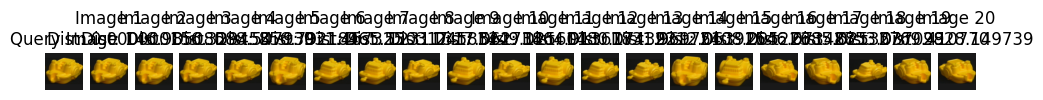

Métriques pour l'image de requête obj4__160.png avec K-Means:
Matrice de confusion:
 [[20]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


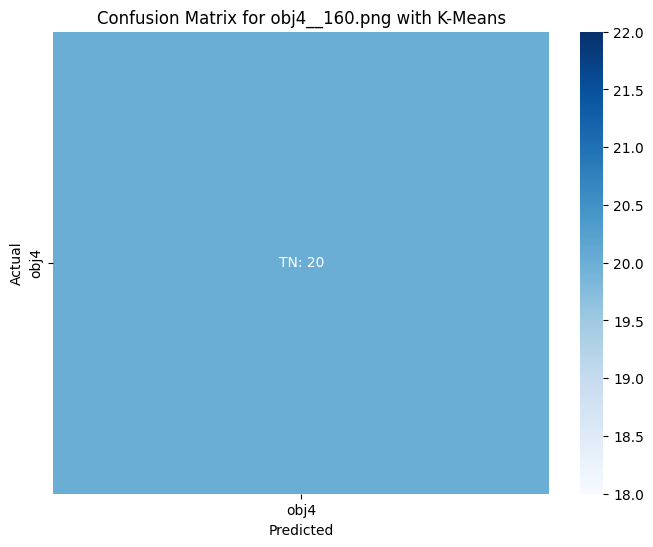

Requête: obj4__160.png
obj4__160.png: 0.000000
obj4__160.png: 0.000000
obj4__155.png: 584.954016
obj4__165.png: 918.286641
obj4__10.png: 1008.682406
obj4__15.png: 1070.660923
obj4__5.png: 1143.007690
obj4__225.png: 1155.201489
obj4__150.png: 1187.466950
obj4__170.png: 1248.566347
obj4__235.png: 1257.301015
obj4__230.png: 1263.185167
obj4__240.png: 1281.070421
obj4__245.png: 1295.942522
obj4__220.png: 1328.444440
obj4__260.png: 1336.574337
obj4__255.png: 1340.291474
obj4__265.png: 1357.846397
obj4__215.png: 1404.173247
obj4__115.png: 1404.388091
obj4__250.png: 1452.813510


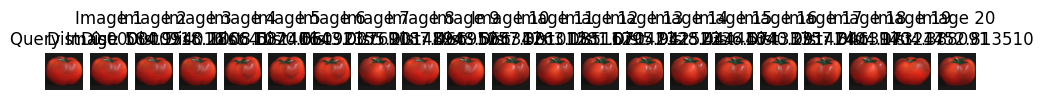

Métriques pour l'image de requête obj5__0 (2).png avec K-Means:
Matrice de confusion:
 [[20]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


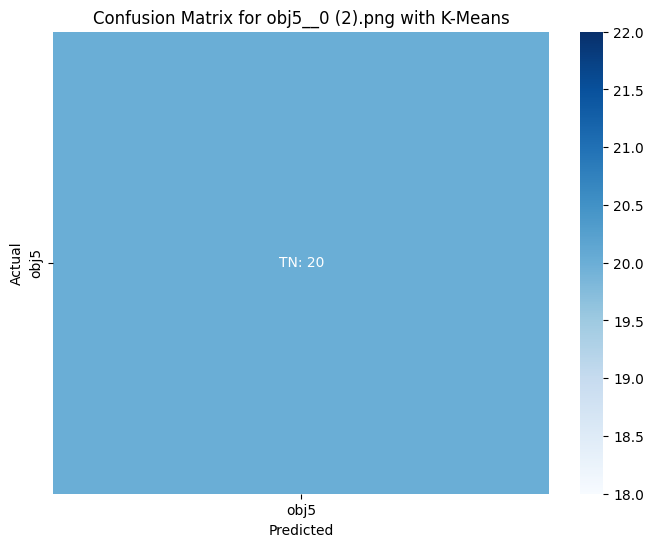

Requête: obj5__0 (2).png
obj5__0 (2).png: 0.000000
obj5__0.png: 0.000000
obj5__5.png: 71.856231
obj5__355.png: 85.662785
obj5__350.png: 188.863189
obj5__10.png: 220.325471
obj5__15.png: 302.918640
obj5__20.png: 306.433799
obj5__345.png: 386.263863
obj5__340.png: 466.864694
obj5__25.png: 487.509170
obj5__35.png: 509.726126
obj5__335.png: 530.474231
obj5__40.png: 604.561847
obj5__30.png: 632.212328
obj5__330.png: 675.784547
obj5__275.png: 709.701643
obj5__320.png: 709.803609
obj5__325.png: 725.116967
obj5__250.png: 728.553582
obj5__265.png: 736.335839


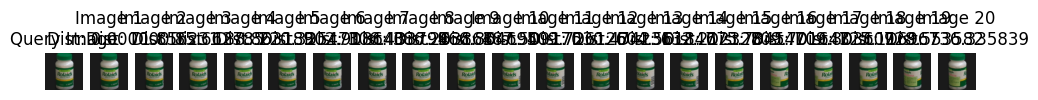

Métriques pour l'image de requête obj6__0 (3).png avec K-Means:
Matrice de confusion:
 [[20]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


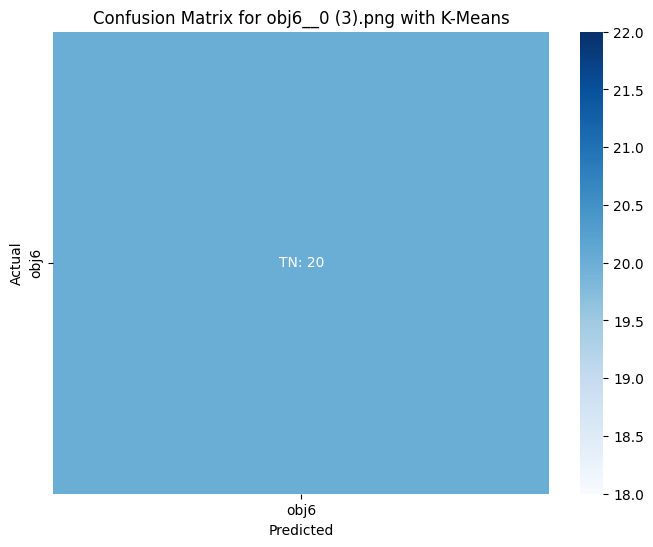

Requête: obj6__0 (3).png
obj6__0 (3).png: 0.000000
obj6__0.png: 0.000000
obj6__5.png: 103.780551
obj6__10.png: 141.602503
obj6__355.png: 168.761687
obj6__15.png: 197.735034
obj6__20.png: 246.620739
obj6__350.png: 311.557653
obj6__175.png: 324.524936
obj6__25.png: 340.446323
obj6__180.png: 365.700682
obj6__30.png: 373.980024
obj6__170.png: 403.622670
obj6__185.png: 434.950057
obj6__35.png: 436.134197
obj6__40.png: 526.862042
obj6__165.png: 550.601646
obj6__345.png: 712.469410
obj6__45.png: 721.674515
obj6__190.png: 739.897108
obj6__160.png: 807.647401


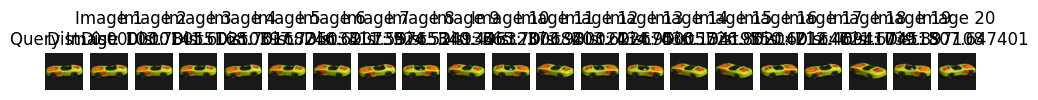

Métriques pour l'image de requête obj7__0 (3).png avec K-Means:
Matrice de confusion:
 [[20]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


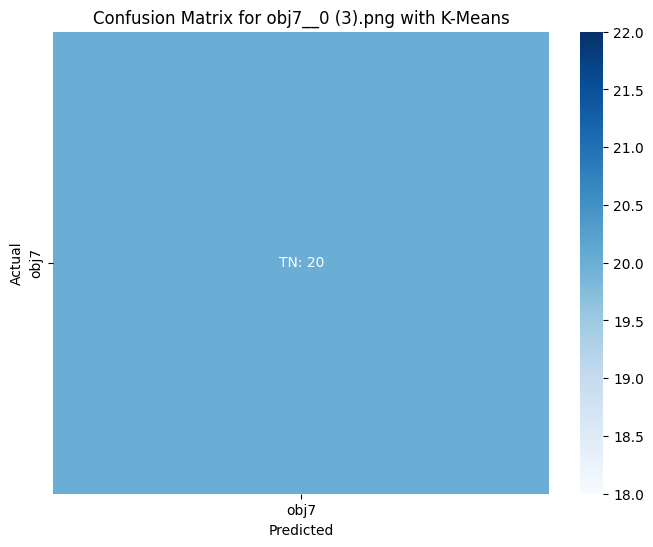

Requête: obj7__0 (3).png
obj7__0 (3).png: 0.000000
obj7__0.png: 0.000000
obj7__5.png: 121.112150
obj7__355.png: 140.567790
obj7__10.png: 180.195899
obj7__350.png: 207.213318
obj7__15.png: 232.135105
obj7__135.png: 336.110573
obj7__20.png: 336.817519
obj7__25.png: 355.244971
obj7__140.png: 365.238505
obj7__130.png: 369.209905
obj7__145.png: 413.246937
obj7__125.png: 420.003042
obj7__345.png: 464.297232
obj7__340.png: 510.422445
obj7__30.png: 519.281044
obj7__150.png: 520.723851
obj7__120.png: 549.668199
obj7__290.png: 590.745647
obj7__285.png: 599.874831


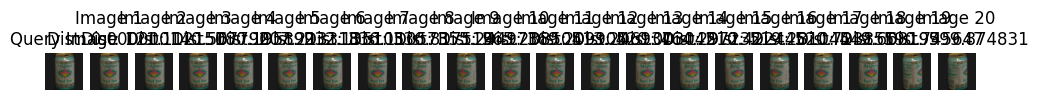

Métriques pour l'image de requête obj8__135.png avec K-Means:
Matrice de confusion:
 [[20]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 1.0000
Rappel: 1.0000
F1 Score: 1.0000


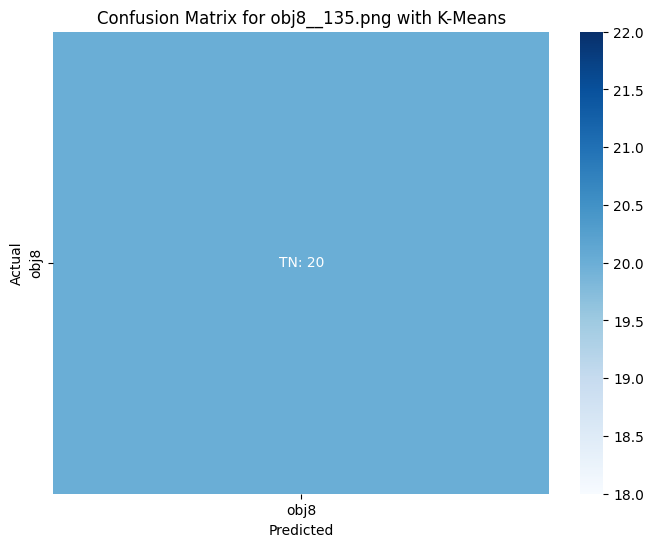

Requête: obj8__135.png
obj8__135.png: 0.000000
obj8__135.png: 0.000000
obj8__140.png: 120.726051
obj8__145.png: 258.005272
obj8__130.png: 472.387238
obj8__150.png: 512.242155
obj8__170.png: 738.094927
obj8__165.png: 741.492159
obj8__155.png: 793.073239
obj8__160.png: 814.782532
obj8__340.png: 927.261816
obj8__195.png: 932.554676
obj8__175.png: 981.004667
obj8__185.png: 1001.002725
obj8__190.png: 1037.724488
obj8__125.png: 1068.271588
obj8__180.png: 1082.305079
obj8__205.png: 1088.815257
obj8__350.png: 1141.500684
obj8__225.png: 1155.927915
obj8__345.png: 1174.323171


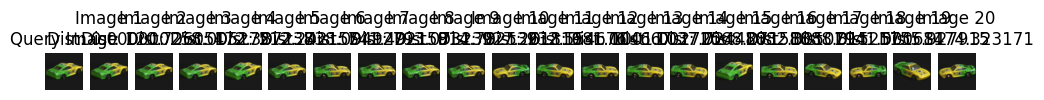

Métriques pour l'image de requête obj9__0 (3).png avec K-Means:
Matrice de confusion:
 [[ 0  0  0]
 [ 2 14  4]
 [ 0  0  0]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 0.3333
Rappel: 0.2333
F1 Score: 0.2745


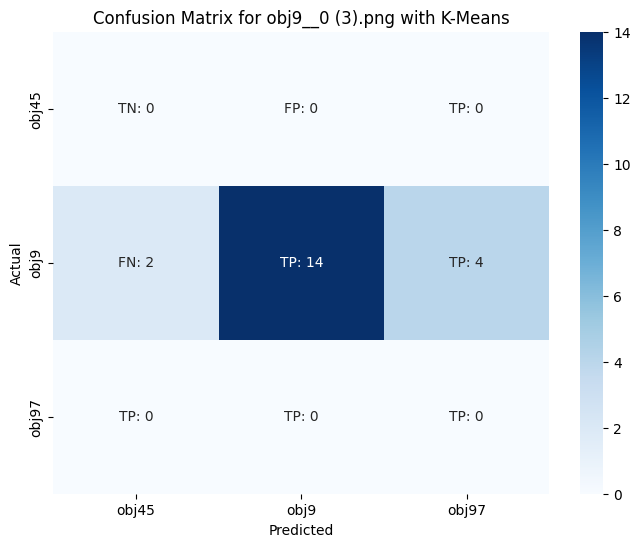

Requête: obj9__0 (3).png
obj9__0 (3).png: 0.000000
obj9__0.png: 0.000000
obj9__355.png: 467.984990
obj9__5.png: 571.730893
obj9__10.png: 1174.793868
obj9__350.png: 1348.669745
obj9__345.png: 2370.190859
obj9__15.png: 2769.855123
obj9__20.png: 2972.128599
obj9__340.png: 3929.183105
obj9__25.png: 4660.267991
obj9__335.png: 4747.108125
obj9__330.png: 5974.190299
obj97__40.png: 6060.780719
obj45__250.png: 6298.803010
obj97__30.png: 6715.490434
obj97__45.png: 6731.473470
obj9__250.png: 7235.038411
obj45__240.png: 7305.921878
obj97__55.png: 7434.727741
obj9__30.png: 7453.922077


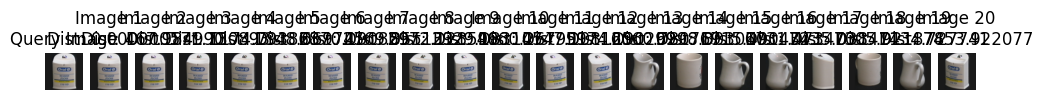

Métriques pour l'image de requête obj10__0 (2).png avec K-Means:
Matrice de confusion:
 [[0 0 0]
 [5 9 6]
 [0 0 0]]
TP: 0, TN: 0, FP: 0, FN: 0
Précision: 0.3333
Rappel: 0.1500
F1 Score: 0.2069


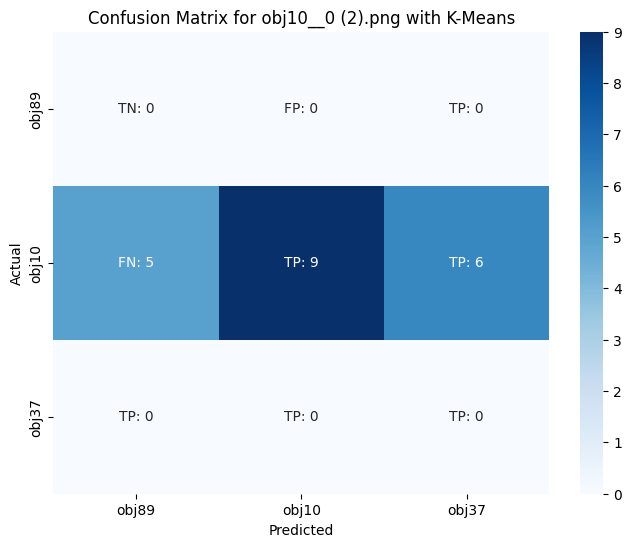

Requête: obj10__0 (2).png
obj10__0 (2).png: 0.000000
obj10__0.png: 0.000000
obj10__10.png: 150.780975
obj10__355.png: 197.391649
obj10__5.png: 292.632185
obj10__340.png: 514.818202
obj10__15.png: 532.771718
obj10__350.png: 691.113987
obj10__345.png: 854.522905
obj10__20.png: 2283.154467
obj37__65.png: 2621.358325
obj37__60.png: 2700.634324
obj37__0.png: 2856.028139
obj89__105.png: 2996.541972
obj37__355.png: 3005.577109
obj37__70.png: 3081.351725
obj89__240.png: 3374.029300
obj89__95.png: 3441.369591
obj89__110.png: 3471.408810
obj89__100.png: 3474.831845
obj37__5.png: 3504.783170


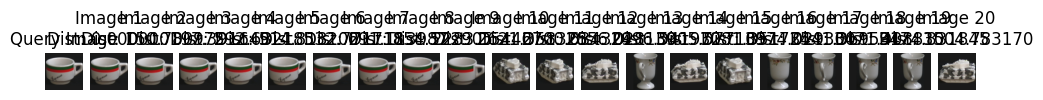

In [9]:
import cv2
import numpy as np
import os
import time
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

def calculate_histogram(image, bins=32):
    hist = []
    for i in range(3):  # Pour chaque canal de couleur (R, G, B)
        h = cv2.calcHist([image], [i], None, [bins], [0, 256])
        hist.append(h.astype(np.float32))  # Convertir en float32
    hist = np.concatenate(hist).ravel()
    return hist

def calculate_hu_moments(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray_image)
    hu_moments = cv2.HuMoments(moments).flatten().astype(np.float32)  # Convertir en float32
    return hu_moments

def calculate_similarity(hist1, hist2, hu1, hu2, w1=0.5, w2=0.5):
    hist_dist = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
    hu_dist = np.linalg.norm(hu1 - hu2)
    return w1 * hist_dist + w2 * hu_dist

def calculate_confusion_matrix_elements(cm):
    if cm.shape == (2, 2):
        TN = cm[0, 0]
        FP = cm[0, 1]
        FN = cm[1, 0]
        TP = cm[1, 1]
    else:
        TN = FP = FN = TP = 0
    return TP, TN, FP, FN

def process_images(database_path, query_image_paths, N=20, num_clusters=10):
    # Calculer les descripteurs pour toutes les images de la base de données
    descriptors = []
    filenames = []

    for filename in os.listdir(database_path):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".tif"):
            image_path = os.path.join(database_path, filename)
            image = cv2.imread(image_path)

            hist = calculate_histogram(image)
            hu = calculate_hu_moments(image)
            descriptor = np.concatenate([hist, hu])

            descriptors.append(descriptor.astype(np.float64))  # Convertir en float64
            filenames.append(filename)

    descriptors = np.array(descriptors)

    # Appliquer K-Means sur les descripteurs
    kmeans_start_time = time.time()
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(descriptors)
    kmeans_end_time = time.time()
    kmeans_execution_time = kmeans_end_time - kmeans_start_time
    labels = kmeans.labels_

    query_results = {}
    execution_times_with_kmeans = []
    execution_times_without_kmeans = []

    for query_image_path in query_image_paths:
        # Avec K-Means
        start_time = time.time()

        query_image = cv2.imread(query_image_path)
        query_hist = calculate_histogram(query_image)
        query_hu = calculate_hu_moments(query_image)
        query_descriptor = np.concatenate([query_hist, query_hu]).astype(np.float64)  # Convertir en float64
        query_label = query_image_path.split('/')[-1].split('__')[0]  # Supposons que l'étiquette soit dans le nom du fichier

        # Trouver le cluster le plus proche pour l'image de requête
        cluster_idx = kmeans.predict([query_descriptor])[0]

        # Comparer l'image de requête uniquement avec les images du même cluster
        cluster_indices = np.where(labels == cluster_idx)[0]

        results_with_kmeans = []

        for idx in cluster_indices:
            filename = filenames[idx]
            descriptor = descriptors[idx]
            hist = descriptor[:96].astype(np.float32)  # 32*3 bins, Convertir en float32
            hu = descriptor[96:].astype(np.float32)  # Convertir en float32

            distance = calculate_similarity(query_hist, hist, query_hu, hu)
            results_with_kmeans.append((filename, distance))

        results_with_kmeans.sort(key=lambda x: x[1])

        # Prendre les N meilleurs résultats comme prédictions
        predicted_labels_with_kmeans = []
        for i in range(min(N, len(results_with_kmeans))):
            predicted_label = results_with_kmeans[i][0].split('__')[0]
            predicted_labels_with_kmeans.append(predicted_label)

        # Enregistrer les résultats pour cette image de requête
        query_results[query_image_path] = (query_label, predicted_labels_with_kmeans, results_with_kmeans[:N])

        end_time = time.time()
        execution_time_with_kmeans = end_time - start_time
        execution_times_with_kmeans.append(execution_time_with_kmeans)

        # Sans K-Means
        start_time = time.time()

        results_without_kmeans = []

        for descriptor, filename in zip(descriptors, filenames):
            hist = descriptor[:96].astype(np.float32)  # 32*3 bins, Convertir en float32
            hu = descriptor[96:].astype(np.float32)  # Convertir en float32

            distance = calculate_similarity(query_hist, hist, query_hu, hu)
            results_without_kmeans.append((filename, distance))

        results_without_kmeans.sort(key=lambda x: x[1])

        # Prendre les N meilleurs résultats comme prédictions
        predicted_labels_without_kmeans = []
        for i in range(min(N, len(results_without_kmeans))):
            predicted_label = results_without_kmeans[i][0].split('__')[0]
            predicted_labels_without_kmeans.append(predicted_label)

        end_time = time.time()
        execution_time_without_kmeans = end_time - start_time
        execution_times_without_kmeans.append(execution_time_without_kmeans)

        # Afficher le temps d'exécution pour l'image de requête
        print(f"Temps d'exécution pour l'image de requête {query_image_path} avec K-Means: {execution_time_with_kmeans:.4f} secondes")
        print(f"Temps d'exécution pour l'image de requête {query_image_path} sans K-Means: {execution_time_without_kmeans:.4f} secondes")

    # Afficher le temps moyen d'exécution
    average_execution_time_with_kmeans = np.mean(execution_times_with_kmeans)
    average_execution_time_without_kmeans = np.mean(execution_times_without_kmeans)
    print(f"Temps moyen d'exécution pour les images de requête avec K-Means: {average_execution_time_with_kmeans:.4f} secondes")
    print(f"Temps moyen d'exécution pour les images de requête sans K-Means: {average_execution_time_without_kmeans:.4f} secondes")
    print(f"Temps d'exécution pour K-Means: {kmeans_execution_time:.4f} secondes")

    for query_image_path, (query_label, predicted_labels_with_kmeans, results_with_kmeans) in query_results.items():
        # Calcul de la matrice de confusion et des métriques pour chaque image de requête
        true_labels = [query_label] * N
        unique_labels = list(set(true_labels + predicted_labels_with_kmeans))
        cm_with_kmeans = confusion_matrix(true_labels, predicted_labels_with_kmeans, labels=unique_labels)
        precision_with_kmeans = precision_score(true_labels, predicted_labels_with_kmeans, average='macro', zero_division=0)
        recall_with_kmeans = recall_score(true_labels, predicted_labels_with_kmeans, average='macro', zero_division=0)
        f1_with_kmeans = f1_score(true_labels, predicted_labels_with_kmeans, average='macro', zero_division=0)

        TP, TN, FP, FN = calculate_confusion_matrix_elements(cm_with_kmeans)

        print(f"Métriques pour l'image de requête {query_image_path} avec K-Means:")
        print("Matrice de confusion:\n", cm_with_kmeans)
        print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
        print("Précision: {:.4f}".format(precision_with_kmeans))
        print("Rappel: {:.4f}".format(recall_with_kmeans))
        print("F1 Score: {:.4f}".format(f1_with_kmeans))

        # Préparer les annotations pour la heatmap
        annotations = np.empty_like(cm_with_kmeans).astype(str)
        for i in range(cm_with_kmeans.shape[0]):
            for j in range(cm_with_kmeans.shape[1]):
                if i == 0 and j == 0:
                    annotations[i, j] = f"TN: {cm_with_kmeans[i, j]}"
                elif i == 0 and j == 1:
                    annotations[i, j] = f"FP: {cm_with_kmeans[i, j]}"
                elif i == 1 and j == 0:
                    annotations[i, j] = f"FN: {cm_with_kmeans[i, j]}"
                else:
                    annotations[i, j] = f"TP: {cm_with_kmeans[i, j]}"

        # Affichage de la matrice de confusion en couleur
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_with_kmeans, annot=annotations, fmt='', cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {query_image_path} with K-Means')
        plt.show()

        # Affichage des résultats pour cette image de requête
        print(f"Requête: {query_image_path}")
        print(f"{os.path.basename(query_image_path)}: 0.000000")
        for i in range(len(results_with_kmeans)):
            print(f"{results_with_kmeans[i][0]}: {results_with_kmeans[i][1]:.6f}")

        plt.figure(figsize=(12, 10))
        query_image = cv2.imread(query_image_path)
        plt.subplot(1, N + 1, 1)
        plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
        plt.title("Query Image")
        plt.axis('off')

        for i in range(len(results_with_kmeans)):
            img_path = os.path.join(database_path, results_with_kmeans[i][0])
            img = cv2.imread(img_path)
            plt.subplot(1, N + 1, i + 2)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f"Image {i+1}\nDist: {results_with_kmeans[i][1]:.6f}")
            plt.axis('off')

        plt.show()

# Télécharger les images requêtes
uploaded = files.upload()
query_image_paths = list(uploaded.keys())[:10]  # Limiter à 10 images de requête

# Définir le chemin vers le dossier contenant les images de la base de données
database_path = "/content/coil-100/coil-100"

# Exécuter le processus de recherche sur plusieurs objets de requête
process_images(database_path, query_image_paths, N=20, num_clusters=10)
